# I. Introduction and Load DataSet

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, confusion_matrix, classification_report
import warnings    
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

import lime
import lime.lime_tabular

from sklearn.naive_bayes import GaussianNB
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

#smote - Tạo thêm dữ liệu để cân bằng 
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pgeocode
import unidecode
from word2number import w2n
pd.set_option('display.max_rows', None)  # Hiển thị tất cả các hàng
pd.set_option('display.max_columns', None)  # Hiển thị tất cả các cột
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [10]:
# Your task 

In [11]:
df = pd.read_csv('C:\\Users\\namqt\\05.Project\\Supply chain logistics problem.csv')


In [43]:
df_freight_rates = pd.read_csv('C:\\Users\\namqt\\05.Project\\freight_rates.csv')

In [12]:
df.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


In [13]:
df.describe()

,Order ID,TPT,Ship ahead day count,Ship Late Day count,Product ID,Unit quantity,Weight
count,9.215000e+03,9215.000000,9215.000000,9215.000000,9.215000e+03,9215.000000,9215.000000
mean,1.447274e+09,1.717743,1.852306,0.039935,1.680536e+06,3202.747151,19.871688
std,8.381629e+04,0.630500,1.922302,0.319625,1.526593e+04,15965.622260,66.569064
min,1.447126e+09,0.000000,0.000000,0.000000,1.613321e+06,235.000000,0.000000
25%,1.447197e+09,1.000000,0.000000,0.000000,1.669702e+06,330.000000,1.407430
50%,1.447276e+09,2.000000,3.000000,0.000000,1.683636e+06,477.000000,4.440000
75%,1.447346e+09,2.000000,3.000000,0.000000,1.689554e+06,1275.500000,13.325673
max,1.447425e+09,4.000000,6.000000,6.000000,1.702654e+06,561847.000000,2338.405126


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              9215 non-null   float64
 1   Order Date            9215 non-null   object 
 2   Origin Port           9215 non-null   object 
 3   Carrier               9215 non-null   object 
 4   TPT                   9215 non-null   int64  
 5   Service Level         9215 non-null   object 
 6   Ship ahead day count  9215 non-null   int64  
 7   Ship Late Day count   9215 non-null   int64  
 8   Customer              9215 non-null   object 
 9   Product ID            9215 non-null   int64  
 10  Plant Code            9215 non-null   object 
 11  Destination Port      9215 non-null   object 
 12  Unit quantity         9215 non-null   int64  
 13  Weight                9215 non-null   float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1008.0+ KB


In [15]:
df.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


In [18]:
df.duplicated().sum()

0

In [19]:
df = df.drop(columns = 'Order ID')

In [20]:
df.columns = df.columns.str.lower()

In [21]:
df.columns = df.columns.str.replace(' ', '_')

In [22]:
df.head(5)

,order_date,origin_port,carrier,tpt,service_level,ship_ahead_day_count,ship_late_day_count,customer,product_id,plant_code,destination_port,unit_quantity,weight
0,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


In [24]:
df['order_date'] = pd.to_datetime(df['order_date']) 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_date            9215 non-null   datetime64[ns]
 1   origin_port           9215 non-null   object        
 2   carrier               9215 non-null   object        
 3   tpt                   9215 non-null   int64         
 4   service_level         9215 non-null   object        
 5   ship_ahead_day_count  9215 non-null   int64         
 6   ship_late_day_count   9215 non-null   int64         
 7   customer              9215 non-null   object        
 8   product_id            9215 non-null   int64         
 9   plant_code            9215 non-null   object        
 10  destination_port      9215 non-null   object        
 11  unit_quantity         9215 non-null   int64         
 12  weight                9215 non-null   float64       
dtypes: datetime64[ns](

# II. EDA


## 2.1. Numerical_feature

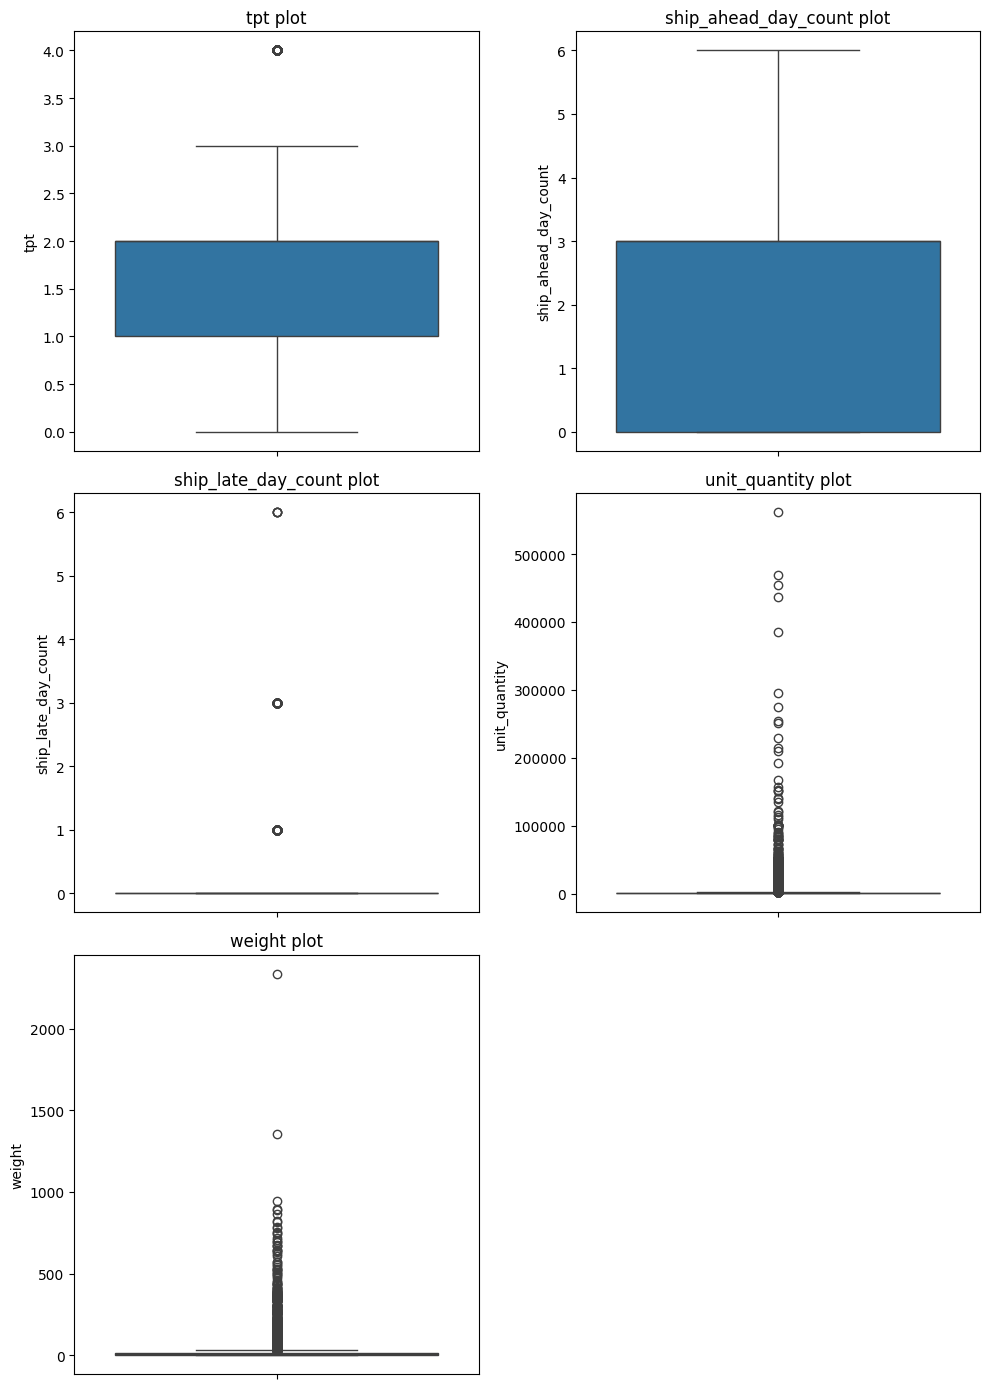

In [38]:
numerical_feature = df.select_dtypes([np.number]).columns.tolist()
numerical_feature.remove('product_id')
fig, ax = plt.subplots(3,2,figsize = (10,14))
for pos,i in enumerate(numerical_feature):
    sns.boxplot(df, y = i, ax = ax[pos//2, pos%2])
    ax[pos//2, pos%2].set_title(f'{i} plot')
for pos in range(5,6):
    fig.delaxes(ax[pos//2, pos%2], )
plt.tight_layout()
plt.show()

## 2.2. Distribution of categorical feature

In [29]:
categorical_feature = df.select_dtypes(include = [object]).columns.tolist()

In [40]:
categorical_feature.append('product_id')

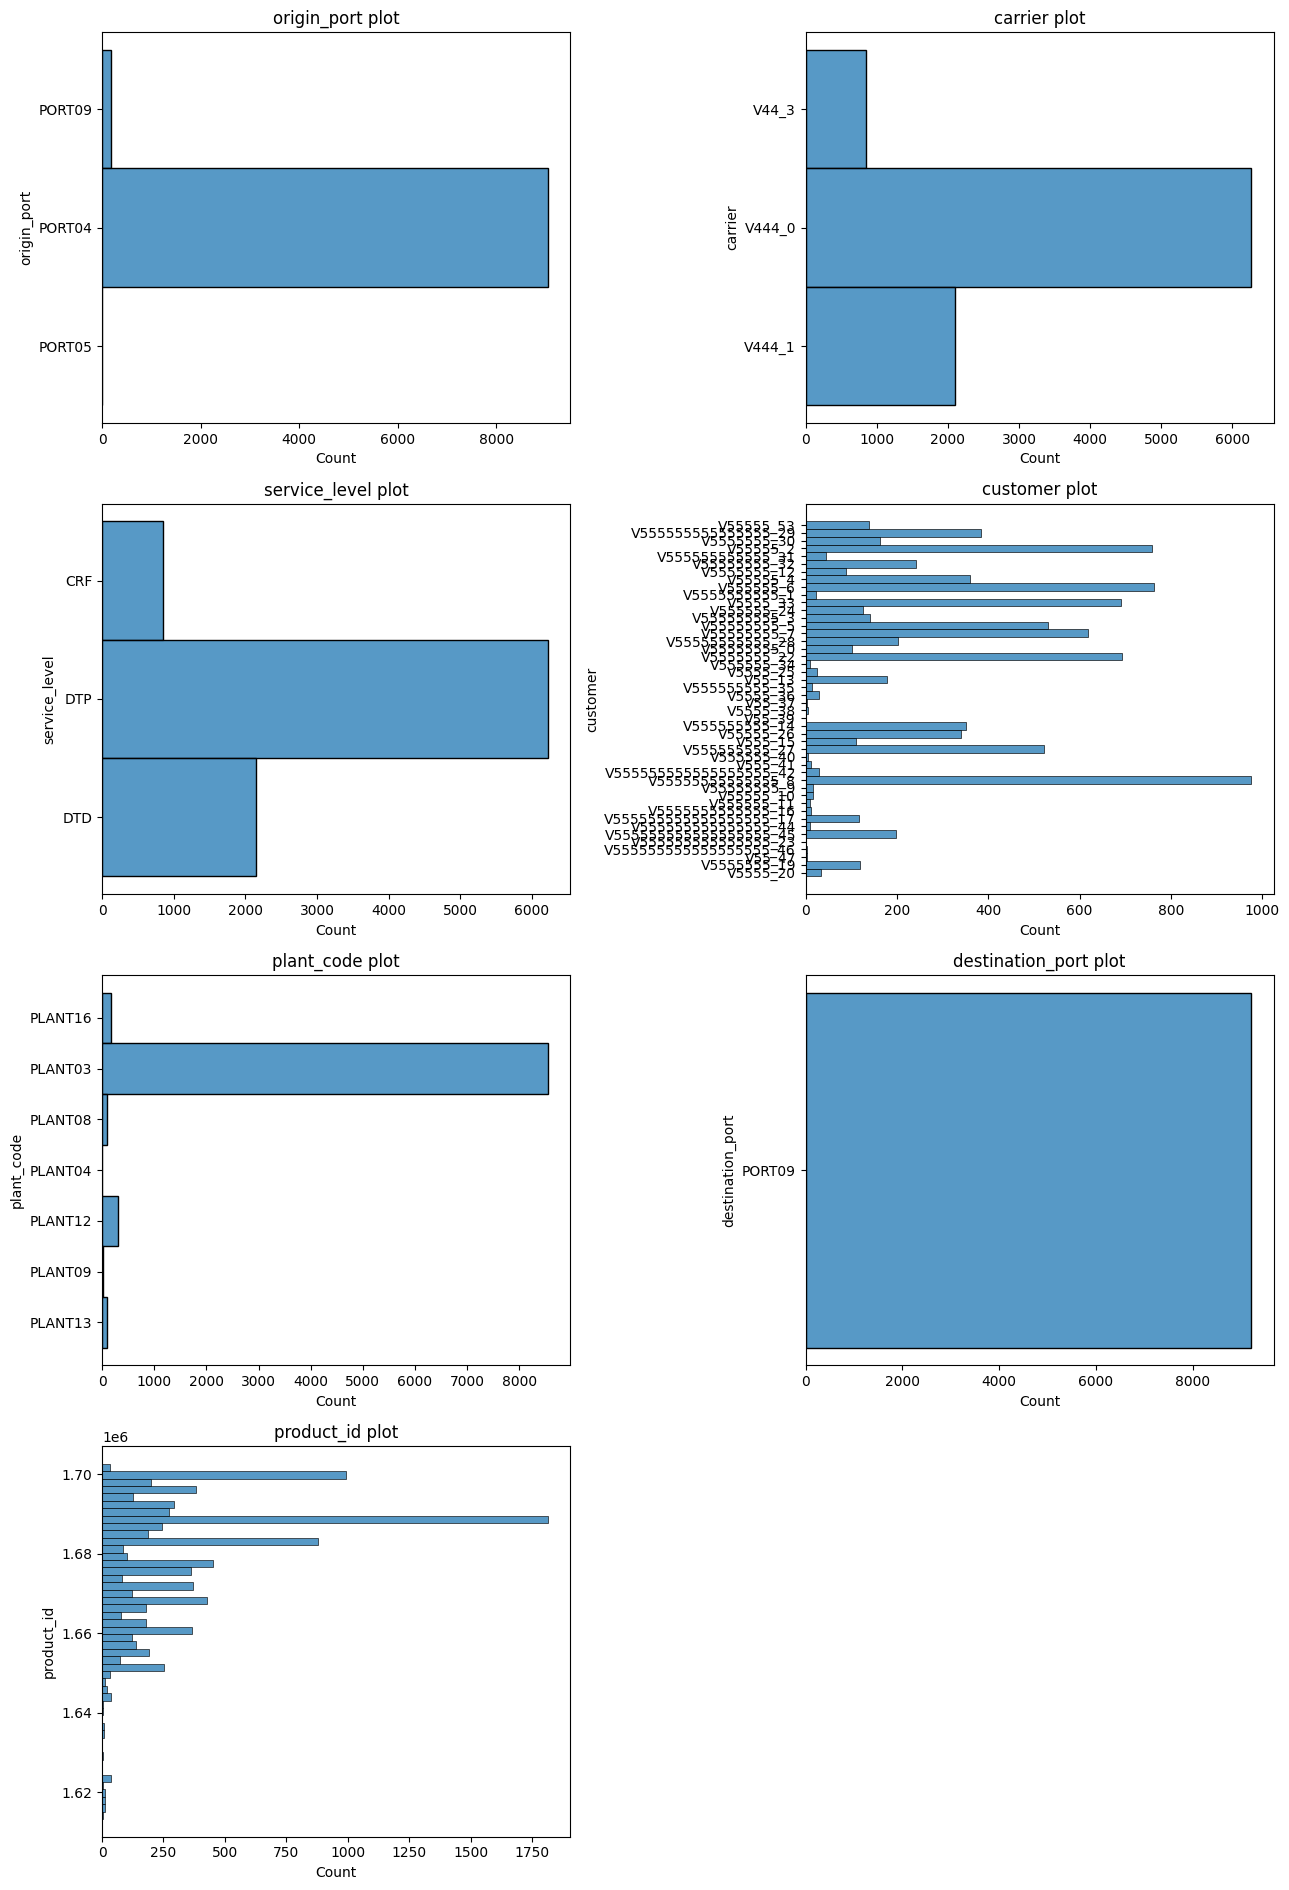

In [41]:
fig, ax = plt.subplots(4,2,figsize = (13,19))
for pos,i in enumerate(categorical_feature):
    sns.histplot(df, y = i, ax = ax[pos//2, pos%2])
    ax[pos//2, pos%2].set_title(f'{i} plot')
for pos in range(7,8):
    fig.delaxes(ax[pos//2, pos%2])
plt.tight_layout()
plt.show()

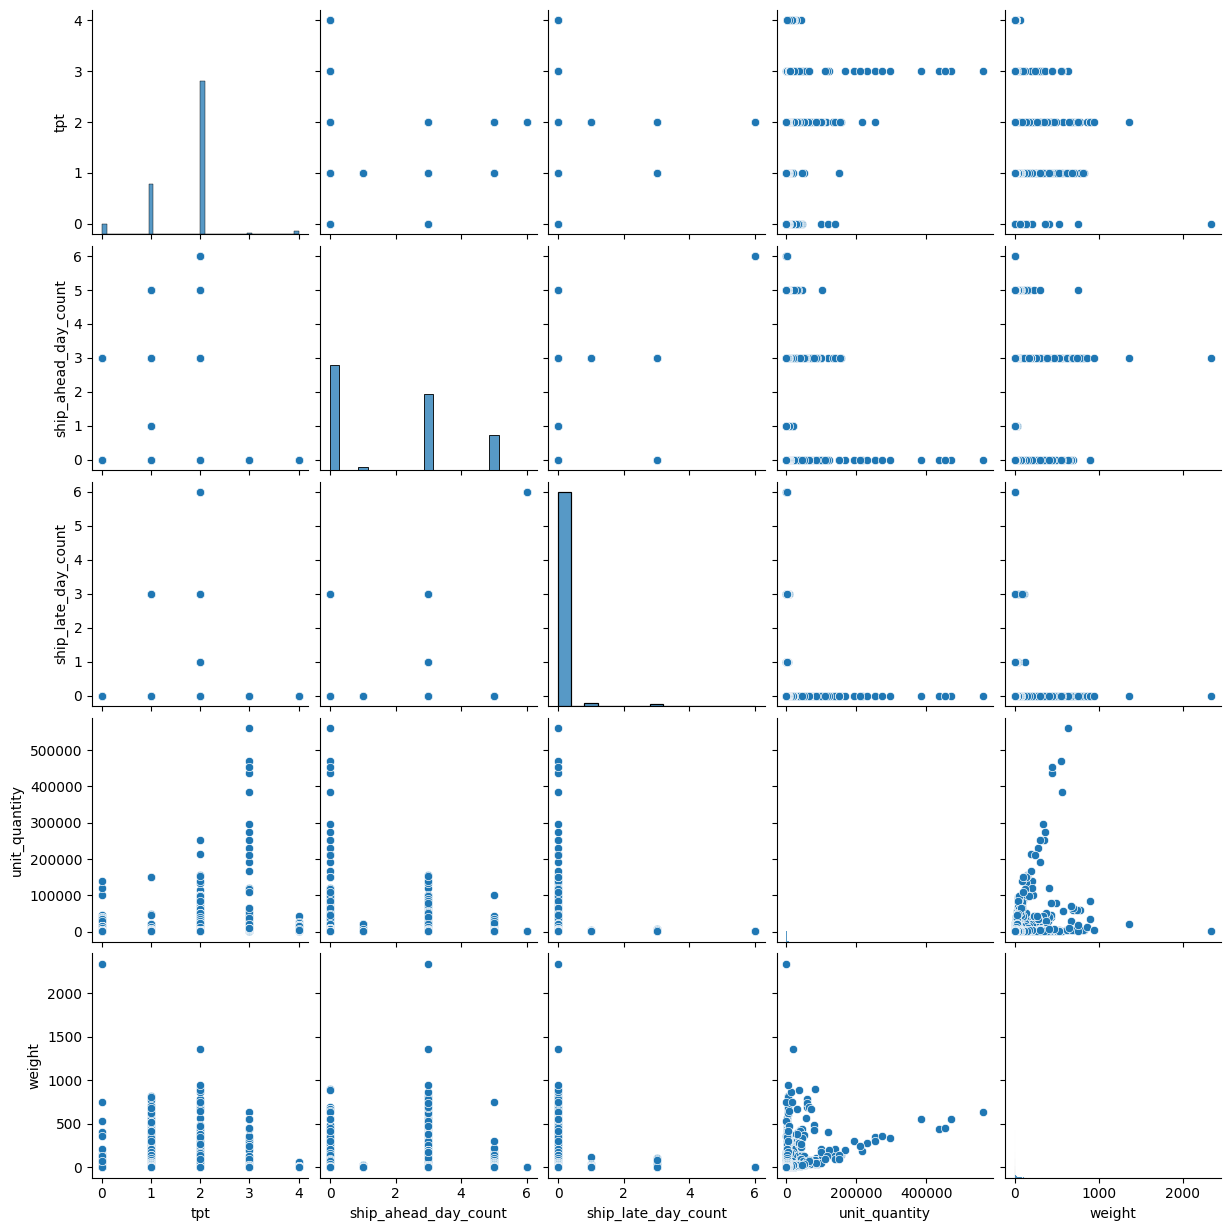

In [63]:
sns.pairplot(df[numerical_feature])

<Axes: >

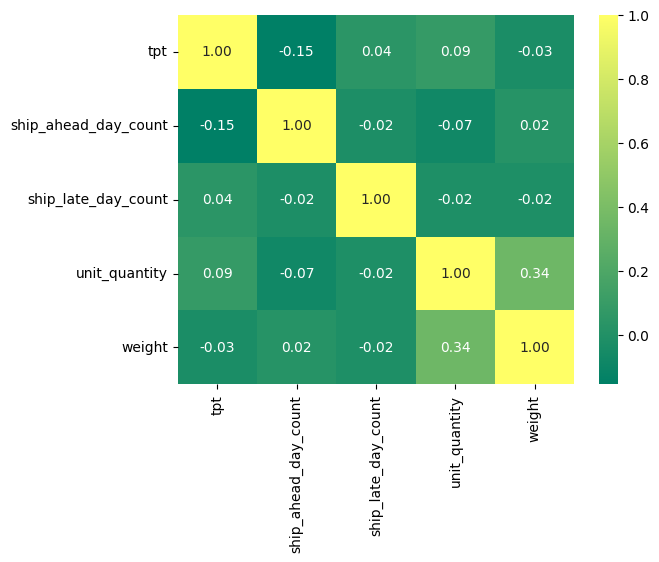

In [64]:
df_number_cor = df[numerical_feature].corr()
sns.heatmap(df_number_cor, cmap = 'summer', annot = True, fmt = '.2f')

In [44]:
df_freight_rates

,Carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type
0,V444_6,PORT08,PORT09,250.0,499.99,DTD,43.2272,0.7132,AIR,2,V88888888_0
1,V444_6,PORT08,PORT09,65.0,69.99,DTD,43.2272,0.7512,AIR,2,V88888888_0
2,V444_6,PORT08,PORT09,60.0,64.99,DTD,43.2272,0.7892,AIR,2,V88888888_0
3,V444_6,PORT08,PORT09,50.0,54.99,DTD,43.2272,0.8272,AIR,2,V88888888_0
4,V444_6,PORT08,PORT09,35.0,39.99,DTD,43.2272,1.0552,AIR,2,V88888888_0
...,...,...,...,...,...,...,...,...,...,...,...
1535,V444_8,PORT03,PORT09,0.0,99.99,DTD,29.3392,0.4116,AIR,0,V88888888_0
1536,V444_8,PORT03,PORT09,500.0,1999.99,DTD,29.3392,0.3112,AIR,0,V88888888_0
1537,V444_8,PORT03,PORT09,250.0,499.99,DTD,29.3392,0.4116,AIR,0,V88888888_0
1538,V444_8,PORT03,PORT09,2000.0,99999.99,DTD,29.3392,0.3112,AIR,0,V88888888_0


In [45]:
df_freight_rates.isna().sum()

Carrier         0
orig_port_cd    0
dest_port_cd    0
minm_wgh_qty    0
max_wgh_qty     0
svc_cd          0
minimum cost    0
rate            0
mode_dsc        0
tpt_day_cnt     0
Carrier type    0
dtype: int64

In [48]:
df_freight_rates.duplicated().sum()
df_freight_rates.drop_duplicates(inplace = True)

In [49]:
df_freight_rates

,Carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type
0,V444_6,PORT08,PORT09,250.0,499.99,DTD,43.2272,0.7132,AIR,2,V88888888_0
1,V444_6,PORT08,PORT09,65.0,69.99,DTD,43.2272,0.7512,AIR,2,V88888888_0
2,V444_6,PORT08,PORT09,60.0,64.99,DTD,43.2272,0.7892,AIR,2,V88888888_0
3,V444_6,PORT08,PORT09,50.0,54.99,DTD,43.2272,0.8272,AIR,2,V88888888_0
4,V444_6,PORT08,PORT09,35.0,39.99,DTD,43.2272,1.0552,AIR,2,V88888888_0
...,...,...,...,...,...,...,...,...,...,...,...
1535,V444_8,PORT03,PORT09,0.0,99.99,DTD,29.3392,0.4116,AIR,0,V88888888_0
1536,V444_8,PORT03,PORT09,500.0,1999.99,DTD,29.3392,0.3112,AIR,0,V88888888_0
1537,V444_8,PORT03,PORT09,250.0,499.99,DTD,29.3392,0.4116,AIR,0,V88888888_0
1538,V444_8,PORT03,PORT09,2000.0,99999.99,DTD,29.3392,0.3112,AIR,0,V88888888_0


Text(0.5, 0, 'transport type')

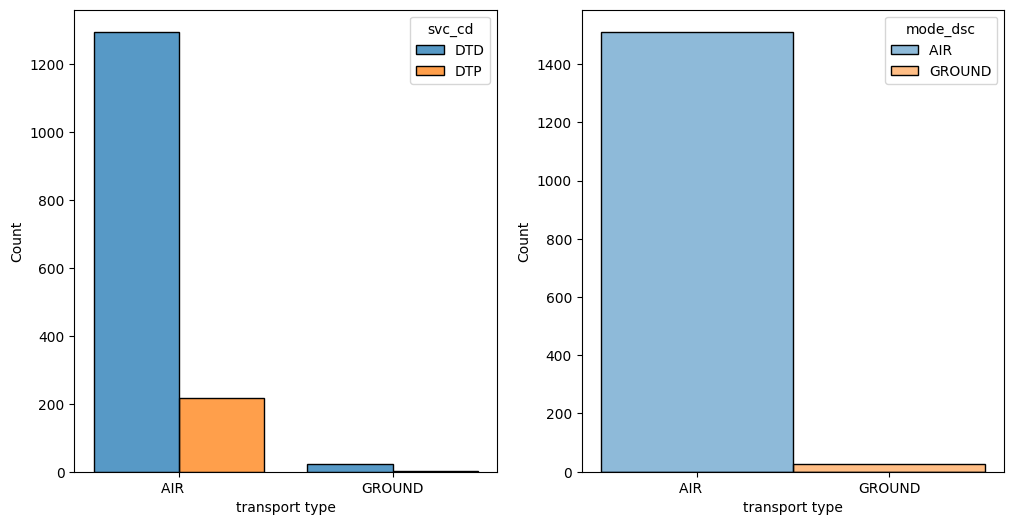

In [60]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.histplot(df_freight_rates, x = 'mode_dsc', hue = 'svc_cd', multiple = 'dodge',shrink = 0.8, ax = ax[0])
sns.histplot(df_freight_rates, x = 'mode_dsc', hue = 'mode_dsc')
ax[0].set_xlabel('transport type')
ax[1].set_xlabel('transport type')
#DTD = door to door
#DTP = door to post
#mode_dsc : Loại hình vận chuyển 
#svc_cd : loại dịch vụ 

In [62]:
df

,order_date,origin_port,carrier,tpt,service_level,ship_ahead_day_count,ship_late_day_count,customer,product_id,plant_code,destination_port,unit_quantity,weight
0,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.300000
1,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.940000
2,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.200000
3,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.160000
4,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118
9211,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118
9212,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,245,0.294265
9213,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683430,PLANT03,PORT09,278,2.480000
